## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [100]:
%pip install wbgapi

In [101]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/examen ciencia dd')

import my_func as fn


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [104]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [105]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [106]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [107]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [108]:
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

**Etapa 1**

Análisis Descriptivo e Imputación de Datos

In [109]:
df_wb_raw.head()

country             Country  NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  \
0     ZWE            Zimbabwe       8.526678e+10          49.843240   
1     ZMB              Zambia       7.612916e+10          46.170619   
3     PSE  West Bank and Gaza       2.769440e+10                NaN   
5     VNM            Viet Nam       1.359364e+12          48.623244   
7     VUT             Vanuatu       1.030020e+09          46.126995   

   SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
0       6232464.0     1.677096   16340822.0          8559888.0   
1       7147630.0     2.794068   20723965.0         10467717.0   
3             NaN     2.393265    5165775.0          2598445.0   
5      56799003.0     0.671429  100352192.0         51201223.0   
7        115453.0     2.324816     320409.0           158611.0   

   SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  ...  SE.TER.ENRR.FE  SE.TER.ENRR.MA  \
0          52.383460          7780934.0  ...             NaN             NaN   
1          50.510204         10256248.0  ...             NaN             NaN   
3          50.301172          2567330.0  ...       54.781748       33.968858   
5          51.021529         49150969.0  ...       36.077468       29.637136   
7          49.502667           161798.0  ...             NaN             NaN   

   SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  \
0             65.013          62.775             60.226                7.5   
1             68.673          66.349             63.936                2.3   
3             71.502          65.170             59.691                NaN   
5             79.264          74.588             69.877               98.7   
7             73.927          71.477             69.445                9.0   

   EG.CFT.ACCS.UR.ZS  IT.NET.USER.FE.ZS  IT.NET.USER.MA.ZS  IT.NET.USER.ZS  
0               77.0                NaN                NaN         38.4266  
1               16.8                NaN                NaN         33.0000  
3                NaN            86.2802            86.9849         86.6377  
5               99.4            75.8894            80.3200         78.0800  
7               52.3                NaN                NaN         45.7313  

[5 rows x 67 columns]

In [110]:
df_wb_raw.tail()

country                         Country  NY.GDP.MKTP.PP.KD  \
261     CEB  Central Europe and the Baltics       4.218704e+12   
262     CSS          Caribbean small states       1.338577e+11   
263     ARB                      Arab World       8.097600e+12   
264     AFW      Africa Western and Central       2.992692e+12   
265     AFE     Africa Eastern and Southern       3.065002e+12   

     SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  \
261          45.670155      49100893.0     0.111693  100183707.0   
262          43.965332       1919128.0     0.501131    4519904.0   
263          19.141318     132483437.0     2.255866  482105978.0   
264          46.355771     212022202.0     2.386204  509398589.0   
265          47.278292     288476515.0     2.519167  750491370.0   

     SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  ...  \
261         51639515.0          51.544825         48544192.0  ...   
262          2293907.0          50.751230          2225997.0  ...   
263        232702770.0          48.267971        249403208.0  ...   
264        252899429.0          49.646669        256499160.0  ...   
265        379019549.0          50.502852        371471821.0  ...   

     SE.TER.ENRR.FE  SE.TER.ENRR.MA  SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  \
261       80.939987       56.712559          81.624607       77.896625   
262             NaN             NaN          76.456921       73.171645   
263       34.757931       31.807100          74.418910       72.444678   
264             NaN             NaN          59.997102       58.855722   
265             NaN             NaN          67.914632       65.146154   

     SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  \
261          74.354109         100.000000         100.000000   
262          69.986624          95.267180          98.879872   
263          70.619437          77.839625          93.857501   
264          57.752356           6.004144          45.206379   
265          62.395419          10.288154          41.289974   

     IT.NET.USER.FE.ZS  IT.NET.USER.MA.ZS  IT.NET.USER.ZS  
261                NaN                NaN             NaN  
262                NaN                NaN             NaN  
263                NaN                NaN             NaN  
264               33.0               44.0            38.5  
265               24.8               30.9            27.8  

[5 rows x 67 columns]

Limpieza de datos y analisis exploratorio

In [111]:
import wbgapi as wb
import pandas as pd

In [112]:
table = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [113]:
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)


In [114]:
df_wb_raw.tail()

country      Country  NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  \
193     AGO       Angola       3.229678e+11          49.450638   
194     AND      Andorra       5.225828e+09                NaN   
195     DZA      Algeria       6.998184e+11          16.830056   
196     ALB      Albania       4.944312e+10          44.994435   
197     AFG  Afghanistan       8.223848e+10           6.846247   

     SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
193      15430003.0     3.080655   36749906.0         18568216.0   
194             NaN     1.433748      80856.0            39502.0   
195      13174228.0     1.498976   46164219.0         22614984.0   
196       1210263.0    -1.543108    2414095.0          1220548.0   
197       8866507.0     2.135594   41454761.0         20530683.0   

     SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  ...  SE.TER.ENRR.FE  \
193          50.525887         18181690.0  ...        9.933616   
194          48.854754            41354.0  ...       68.003820   
195          48.988123         23549235.0  ...       67.258843   
196          50.559226          1193547.0  ...       77.031527   
197          49.525513         20924078.0  ...             NaN   

     SE.TER.ENRR.MA  SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  \
193       10.165600             67.144          64.617             62.099   
194       57.193764             86.107          84.041             82.100   
195       44.258295             77.696          76.261             74.895   
196       52.749937             81.446          79.602             77.728   
197             NaN             67.536          66.035             64.467   

     EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.FE.ZS  \
193                8.4               75.0                NaN   
194              100.0              100.0                NaN   
195               99.1               99.9                NaN   
196               72.5               95.2            81.7239   
197               20.4               87.0                NaN   

     IT.NET.USER.MA.ZS  IT.NET.USER.ZS  
193                NaN         44.7581  
194                NaN         95.4456  
195                NaN         76.9081  
196              84.59         83.1356  
197                NaN         17.7089  

[5 rows x 67 columns]

In [115]:
df_wb_raw.head()

country             Country  NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  \
0     ZWE            Zimbabwe       8.526678e+10          49.843240   
1     ZMB              Zambia       7.612916e+10          46.170619   
2     PSE  West Bank and Gaza       2.769440e+10                NaN   
3     VNM            Viet Nam       1.359364e+12          48.623244   
4     VUT             Vanuatu       1.030020e+09          46.126995   

   SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
0       6232464.0     1.677096   16340822.0          8559888.0   
1       7147630.0     2.794068   20723965.0         10467717.0   
2             NaN     2.393265    5165775.0          2598445.0   
3      56799003.0     0.671429  100352192.0         51201223.0   
4        115453.0     2.324816     320409.0           158611.0   

   SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  ...  SE.TER.ENRR.FE  SE.TER.ENRR.MA  \
0          52.383460          7780934.0  ...             NaN             NaN   
1          50.510204         10256248.0  ...             NaN             NaN   
2          50.301172          2567330.0  ...       54.781748       33.968858   
3          51.021529         49150969.0  ...       36.077468       29.637136   
4          49.502667           161798.0  ...             NaN             NaN   

   SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  \
0             65.013          62.775             60.226                7.5   
1             68.673          66.349             63.936                2.3   
2             71.502          65.170             59.691                NaN   
3             79.264          74.588             69.877               98.7   
4             73.927          71.477             69.445                9.0   

   EG.CFT.ACCS.UR.ZS  IT.NET.USER.FE.ZS  IT.NET.USER.MA.ZS  IT.NET.USER.ZS  
0               77.0                NaN                NaN         38.4266  
1               16.8                NaN                NaN         33.0000  
2                NaN            86.2802            86.9849         86.6377  
3               99.4            75.8894            80.3200         78.0800  
4               52.3                NaN                NaN         45.7313  

[5 rows x 67 columns]

In [116]:
df_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           189 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

<Axes: >

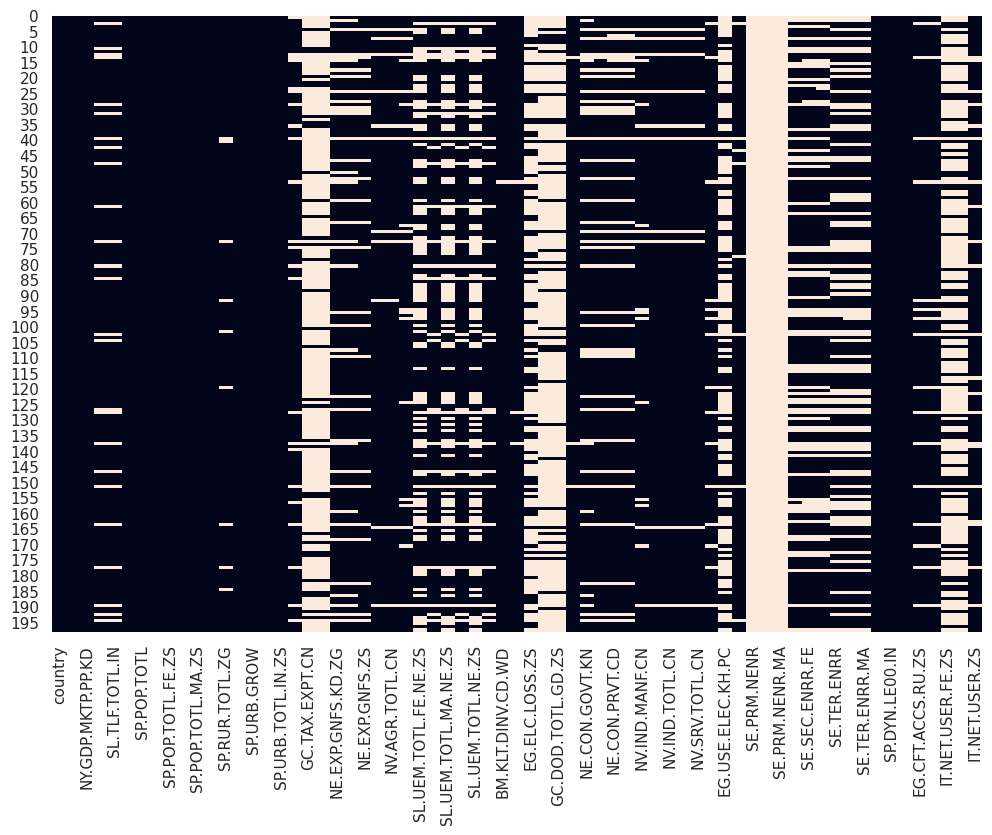

In [117]:
import seaborn as sns
sns.heatmap(df_wb_raw.isnull(), cbar=False)

Interpretacion:
El heatmap evidencial la presencia de datos faltantes e varias variables. Para tratarlos aplicaremos lo siguiente: Siuna variable presenta mas de 15% de valores faltantes, se elimina el analisis. Y si es contrario (≤15%) se imputan los valores faltantes para conservar la variable.

Criterio de limpieza: regla del 15% de valores faltantes

In [120]:
mask_bool = df_wb_raw.isna().mean()>0.15
drop_colums = list(df_wb_raw.isna().mean()[mask_bool].index)


In [121]:


df_wb_limpio = df_wb_raw.drop(columns=drop_colums)

In [122]:
df_wb_raw.isna().mean()

country              0.000000
Country              0.000000
NY.GDP.MKTP.PP.KD    0.000000
SL.TLF.TOTL.FE.ZS    0.126263
SL.TLF.TOTL.IN       0.126263
                       ...   
EG.CFT.ACCS.RU.ZS    0.080808
EG.CFT.ACCS.UR.ZS    0.080808
IT.NET.USER.FE.ZS    0.712121
IT.NET.USER.MA.ZS    0.712121
IT.NET.USER.ZS       0.106061
Length: 67, dtype: float64

In [123]:
# Confirmamos la cantidad de datos
print(f"El dataframe contiene {df_wb_limpio.shape[0]} filas y {df_wb_limpio.shape[1]} columnas, donde {len(df_wb_limpio.isna().sum()[df_wb_limpio.isna().mean()>0].index)} contiene datos nulos bajo el 15%")

El dataframe contiene 198 filas y 41 columnas, donde 24 contiene datos nulos bajo el 15%


In [124]:
# Verificamos
df_wb_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           189 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

In [125]:
df_wb_limpio.index = df_wb_limpio['Country']
df_wb_limpio = df_wb_limpio.drop(columns = ["country","Country"])

In [126]:
df_wb_limpio.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  \
Country                                                                    
Zimbabwe                 8.526678e+10          49.843240       6232464.0   
Zambia                   7.612916e+10          46.170619       7147630.0   
West Bank and Gaza       2.769440e+10                NaN             NaN   
Viet Nam                 1.359364e+12          48.623244      56799003.0   
Vanuatu                  1.030020e+09          46.126995        115453.0   

                    SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
Country                                                           
Zimbabwe               1.677096   16340822.0          8559888.0   
Zambia                 2.794068   20723965.0         10467717.0   
West Bank and Gaza     2.393265    5165775.0          2598445.0   
Viet Nam               0.671429  100352192.0         51201223.0   
Vanuatu                2.324816     320409.0           158611.0   

                    SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  \
Country                                                                       
Zimbabwe                    52.383460          7780934.0          47.616540   
Zambia                      50.510204         10256248.0          49.489796   
West Bank and Gaza          50.301172          2567330.0          49.698828   
Viet Nam                    51.021529         49150969.0          48.978471   
Vanuatu                     49.502667           161798.0          50.497333   

                    SP.RUR.TOTL  ...  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  \
Country                          ...                                   
Zimbabwe              9920197.0  ...    1.777929e+10    3.348446e+10   
Zambia               11392257.0  ...    1.566890e+10    3.167001e+11   
West Bank and Gaza     678902.0  ...    1.044720e+10    1.044720e+10   
Viet Nam             62088011.0  ...    1.834968e+11    4.364896e+15   
Vanuatu                249069.0  ...             NaN             NaN   

                    EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  \
Country                                                       
Zimbabwe                      30.7                   0.9636   
Zambia                         9.2                   1.2905   
West Bank and Gaza             NaN                      NaN   
Viet Nam                      98.7                  50.1898   
Vanuatu                       20.6                   0.0011   

                    SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  \
Country                                                                    
Zimbabwe                       65.013          62.775             60.226   
Zambia                         68.673          66.349             63.936   
West Bank and Gaza             71.502          65.170             59.691   
Viet Nam                       79.264          74.588             69.877   
Vanuatu                        73.927          71.477             69.445   

                    EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
Country                                                                   
Zimbabwe                          7.5               77.0         38.4266  
Zambia                            2.3               16.8         33.0000  
West Bank and Gaza                NaN                NaN         86.6377  
Viet Nam                         98.7               99.4         78.0800  
Vanuatu                           9.0               52.3         45.7313  

[5 rows x 39 columns]

Datos por media

In [127]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_wb_media = pd.DataFrame(imputer.fit_transform(df_wb_limpio), columns=df_wb_limpio.columns, index=df_wb_limpio.index)

In [128]:
df_wb_media.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  \
Country                                                                    
Zimbabwe                 8.526678e+10          49.843240    6.232464e+06   
Zambia                   7.612916e+10          46.170619    7.147630e+06   
West Bank and Gaza       2.769440e+10          41.898361    2.076029e+07   
Viet Nam                 1.359364e+12          48.623244    5.679900e+07   
Vanuatu                  1.030020e+09          46.126995    1.154530e+05   

                    SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
Country                                                           
Zimbabwe               1.677096   16340822.0          8559888.0   
Zambia                 2.794068   20723965.0         10467717.0   
West Bank and Gaza     2.393265    5165775.0          2598445.0   
Viet Nam               0.671429  100352192.0         51201223.0   
Vanuatu                2.324816     320409.0           158611.0   

                    SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  \
Country                                                                       
Zimbabwe                    52.383460          7780934.0          47.616540   
Zambia                      50.510204         10256248.0          49.489796   
West Bank and Gaza          50.301172          2567330.0          49.698828   
Viet Nam                    51.021529         49150969.0          48.978471   
Vanuatu                     49.502667           161798.0          50.497333   

                    SP.RUR.TOTL  ...  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  \
Country                          ...                                   
Zimbabwe              9920197.0  ...    1.777929e+10    3.348446e+10   
Zambia               11392257.0  ...    1.566890e+10    3.167001e+11   
West Bank and Gaza     678902.0  ...    1.044720e+10    1.044720e+10   
Viet Nam             62088011.0  ...    1.834968e+11    4.364896e+15   
Vanuatu                249069.0  ...    2.404534e+11    5.135587e+14   

                    EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  \
Country                                                       
Zimbabwe                 30.700000                 0.963600   
Zambia                    9.200000                 1.290500   
West Bank and Gaza       70.320055                16.892307   
Viet Nam                 98.700000                50.189800   
Vanuatu                  20.600000                 0.001100   

                    SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  \
Country                                                                    
Zimbabwe                       65.013          62.775             60.226   
Zambia                         68.673          66.349             63.936   
West Bank and Gaza             71.502          65.170             59.691   
Viet Nam                       79.264          74.588             69.877   
Vanuatu                        73.927          71.477             69.445   

                    EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
Country                                                                   
Zimbabwe                     7.500000          77.000000         38.4266  
Zambia                       2.300000          16.800000         33.0000  
West Bank and Gaza          62.271154          78.501099         86.6377  
Viet Nam                    98.700000          99.400000         78.0800  
Vanuatu                      9.000000          52.300000         45.7313  

[5 rows x 39 columns]

Random Forest

In [129]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np


In [130]:
df_randomf = df_wb_limpio.copy()

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=42),
    max_iter=10,
    random_state=42)

df_randomf = pd.DataFrame(imputer.fit_transform(df_randomf), columns=df_randomf.columns)
df_randomf.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  \
0       8.526678e+10          49.843240       6232464.0     1.677096   
1       7.612916e+10          46.170619       7147630.0     2.794068   
2       2.769440e+10          44.408837       2583153.7     2.393265   
3       1.359364e+12          48.623244      56799003.0     0.671429   
4       1.030020e+09          46.126995        115453.0     2.324816   

   SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
0   16340822.0          8559888.0          52.383460          7780934.0   
1   20723965.0         10467717.0          50.510204         10256248.0   
2    5165775.0          2598445.0          50.301172          2567330.0   
3  100352192.0         51201223.0          51.021529         49150969.0   
4     320409.0           158611.0          49.502667           161798.0   

   SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  ...  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  \
0          47.616540    9920197.0  ...    1.777929e+10    3.348446e+10   
1          49.489796   11392257.0  ...    1.566890e+10    3.167001e+11   
2          49.698828     678902.0  ...    1.044720e+10    1.044720e+10   
3          48.978471   62088011.0  ...    1.834968e+11    4.364896e+15   
4          50.497333     249069.0  ...    8.859178e+08    1.346006e+14   

   EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  \
0           30.70                   0.9636             65.013          62.775   
1            9.20                   1.2905             68.673          66.349   
2           50.63                   0.6415             71.502          65.170   
3           98.70                  50.1898             79.264          74.588   
4           20.60                   0.0011             73.927          71.477   

   SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
0             60.226               7.50             77.000         38.4266  
1             63.936               2.30             16.800         33.0000  
2             59.691              17.12             76.285         86.6377  
3             69.877              98.70             99.400         78.0800  
4             69.445               9.00             52.300         45.7313  

[5 rows x 39 columns]

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

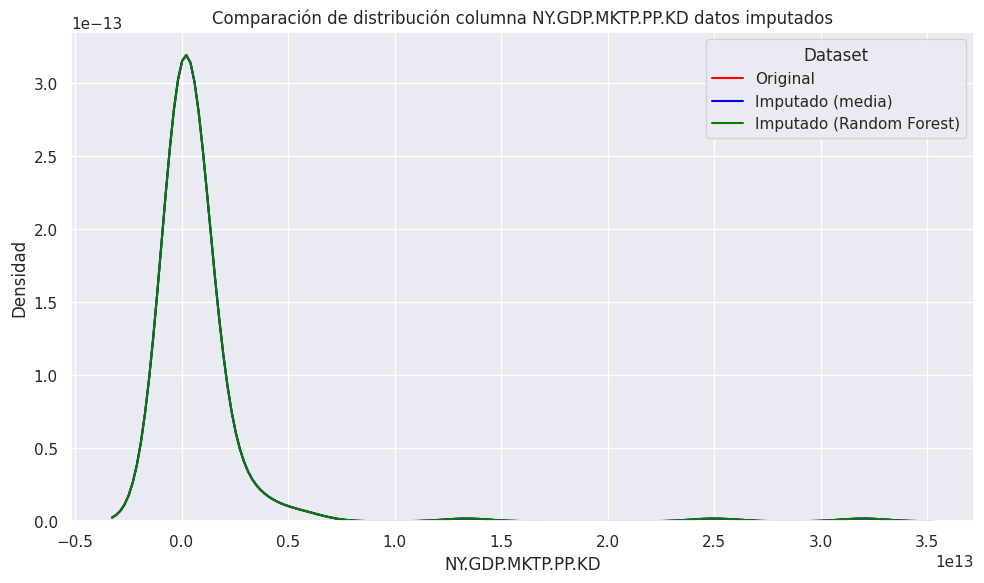

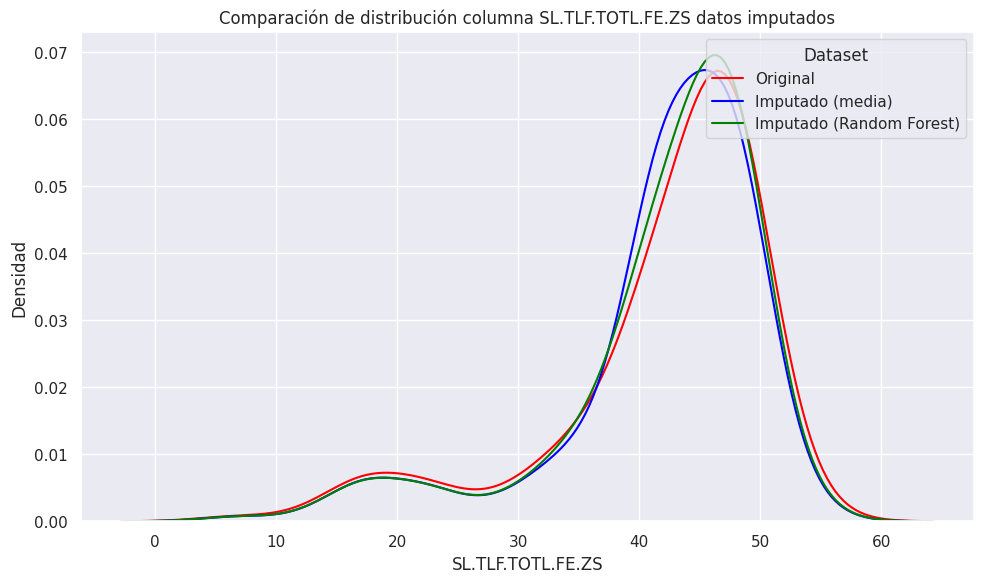

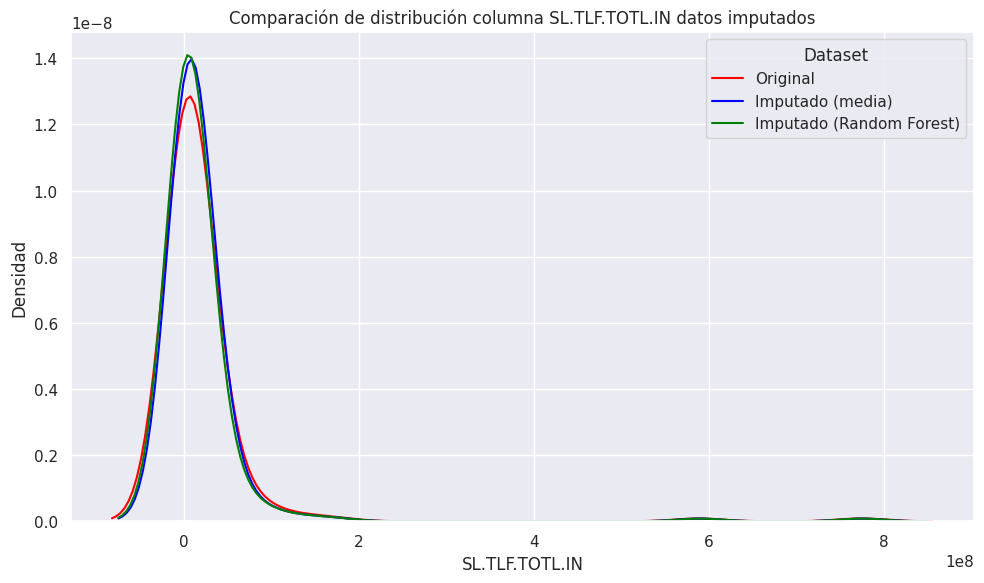

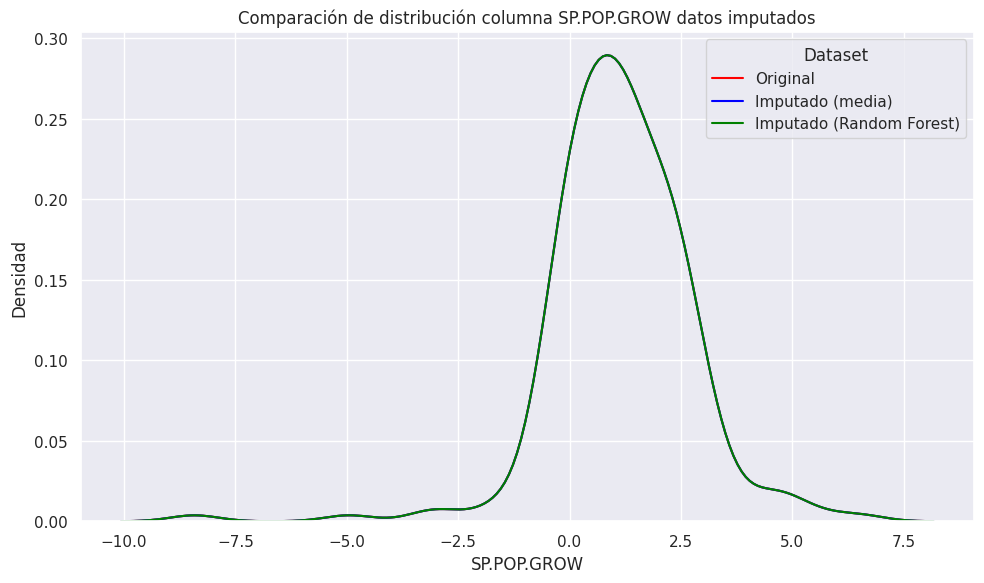

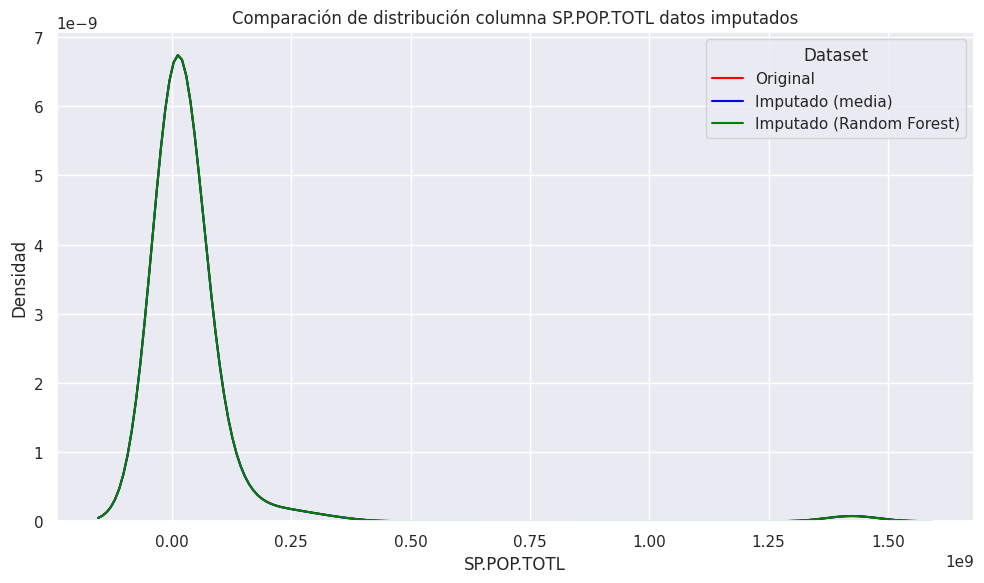

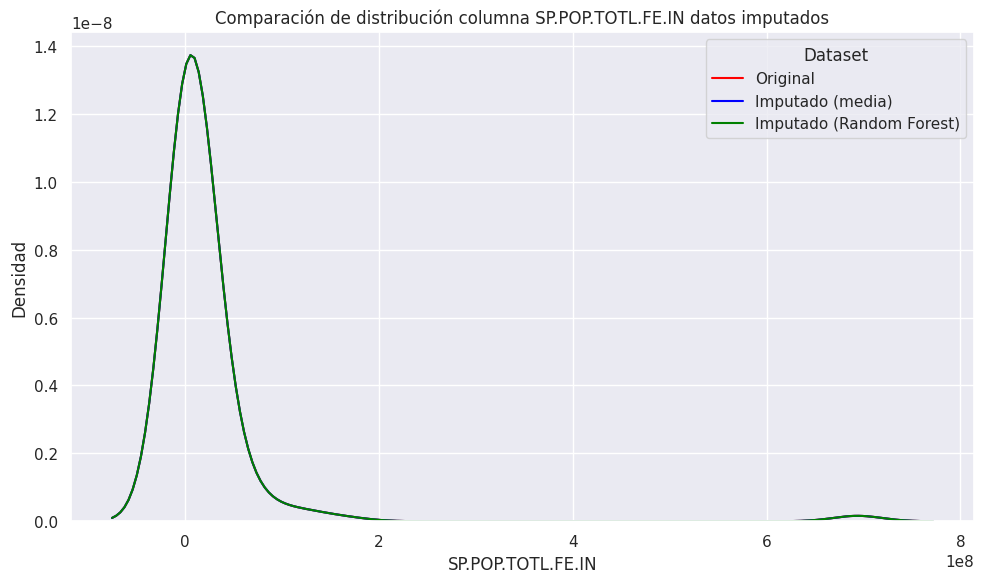

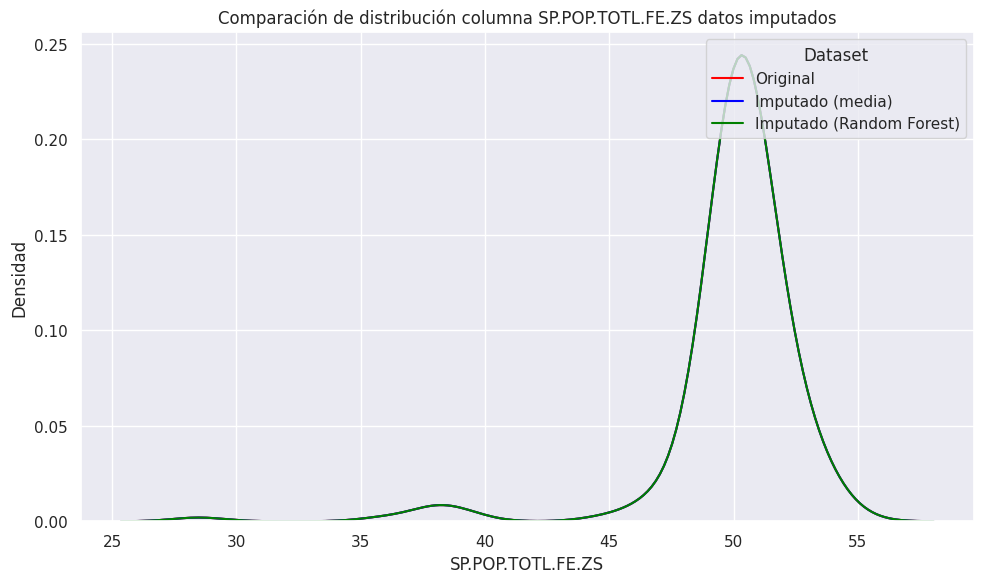

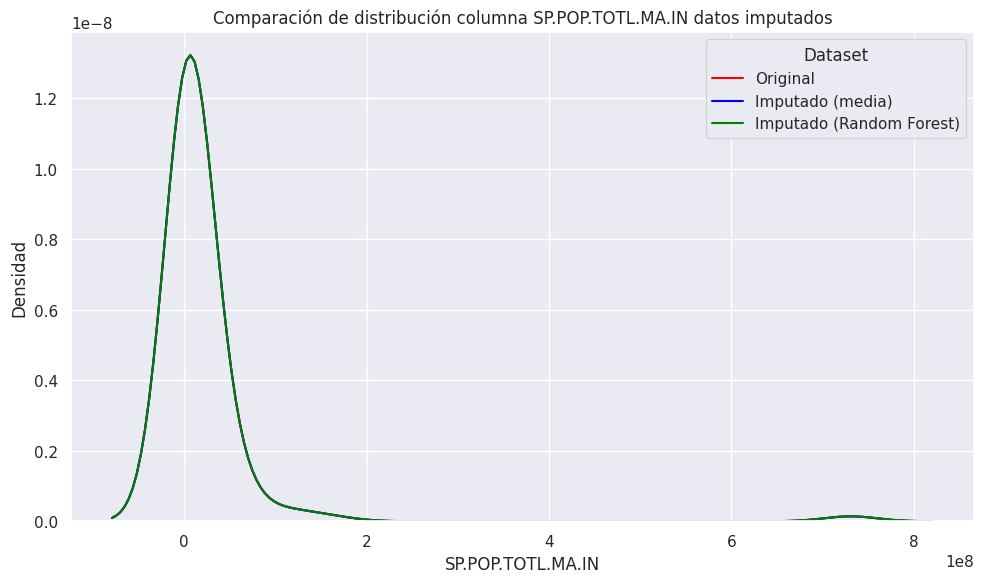

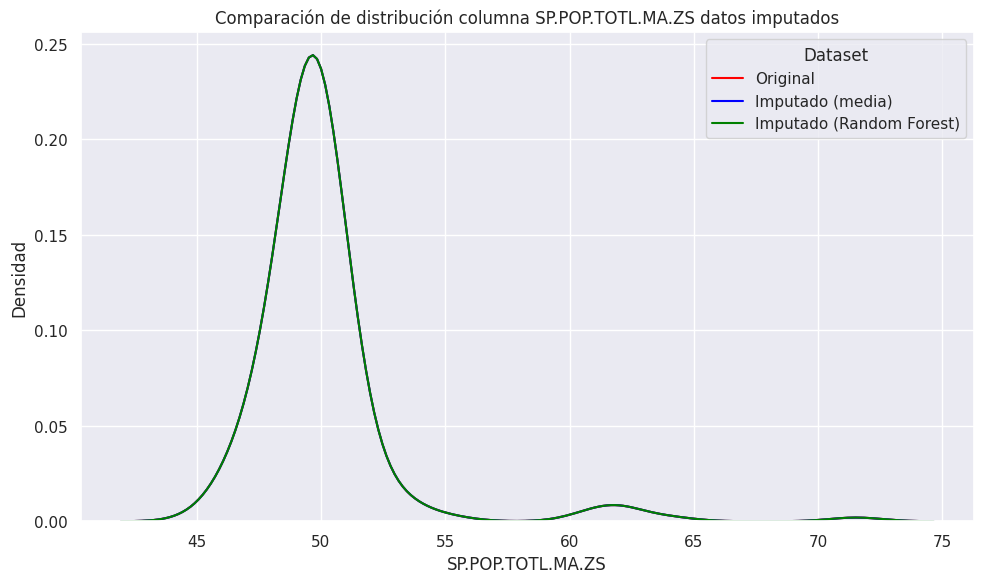

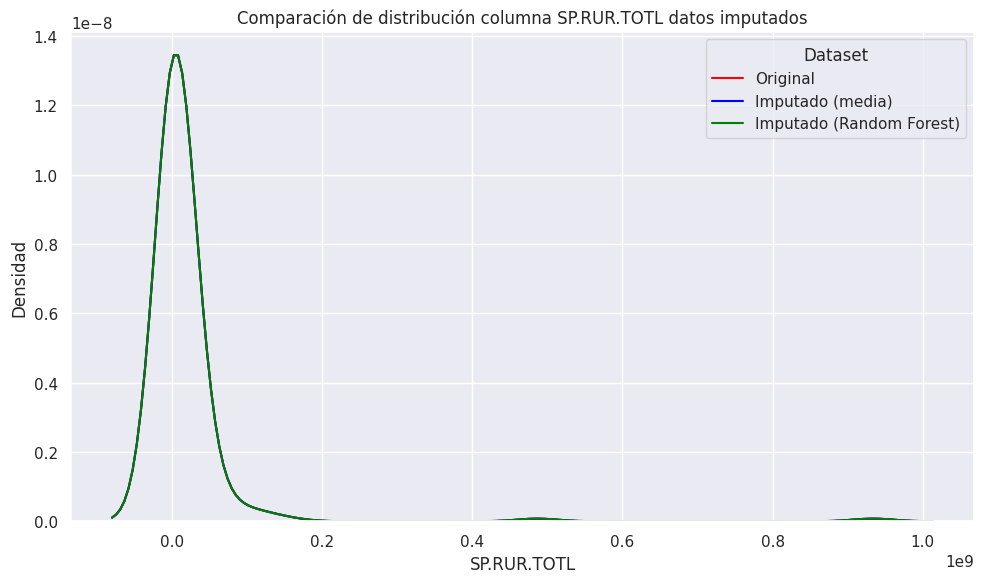

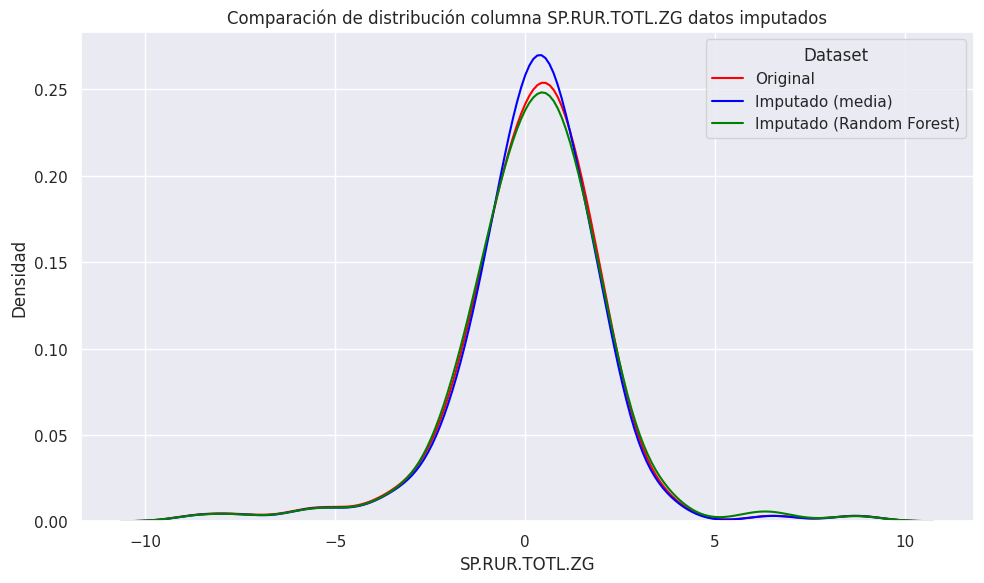

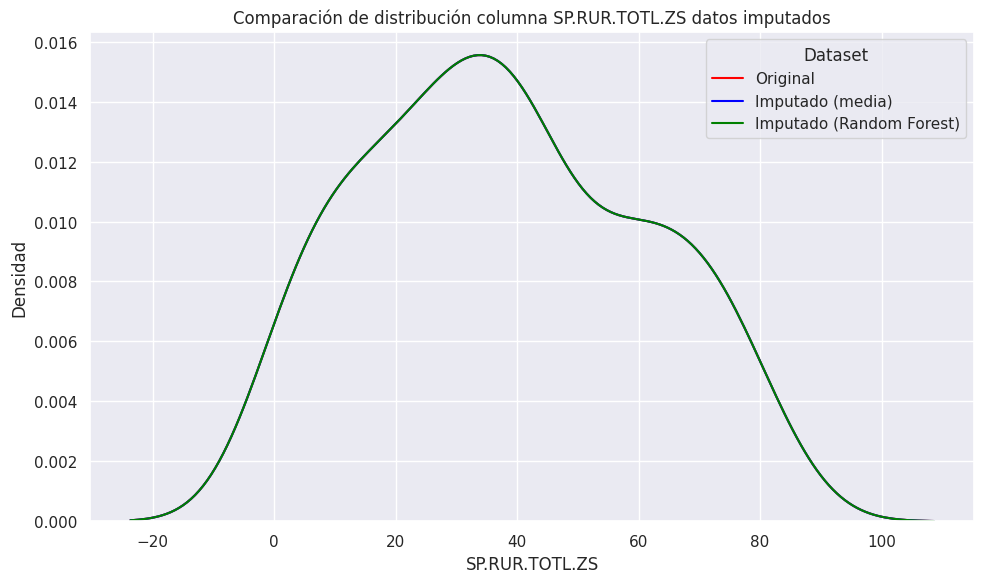

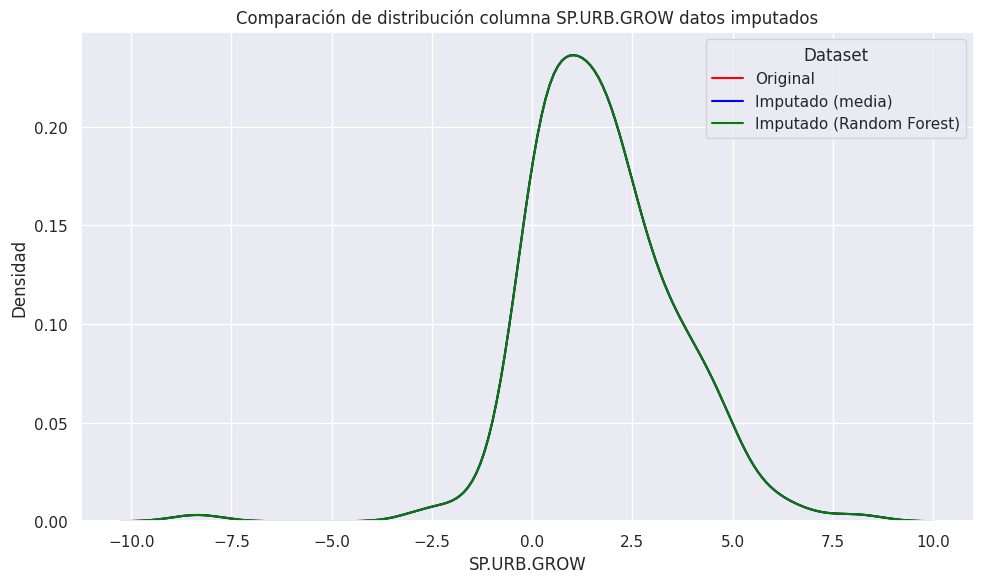

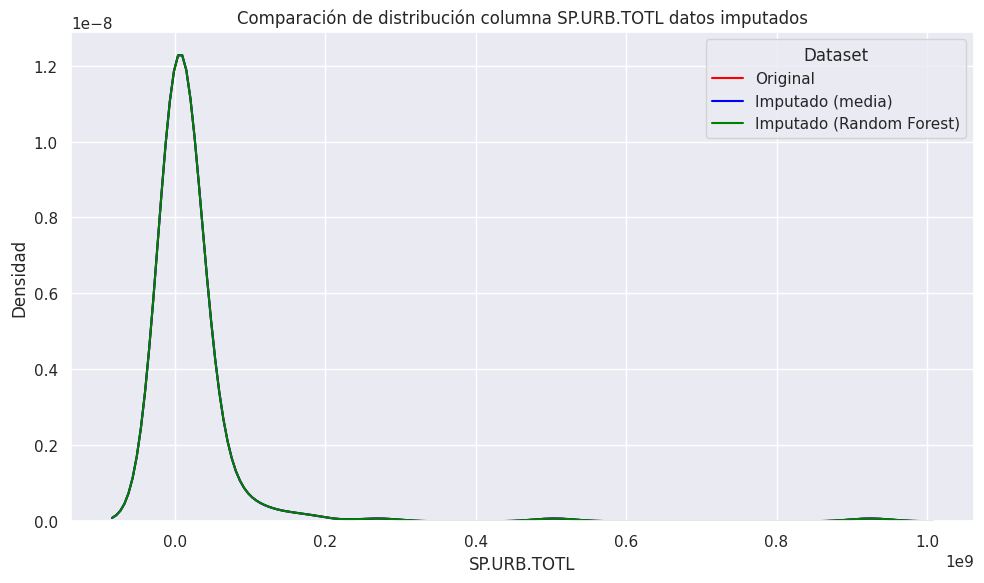

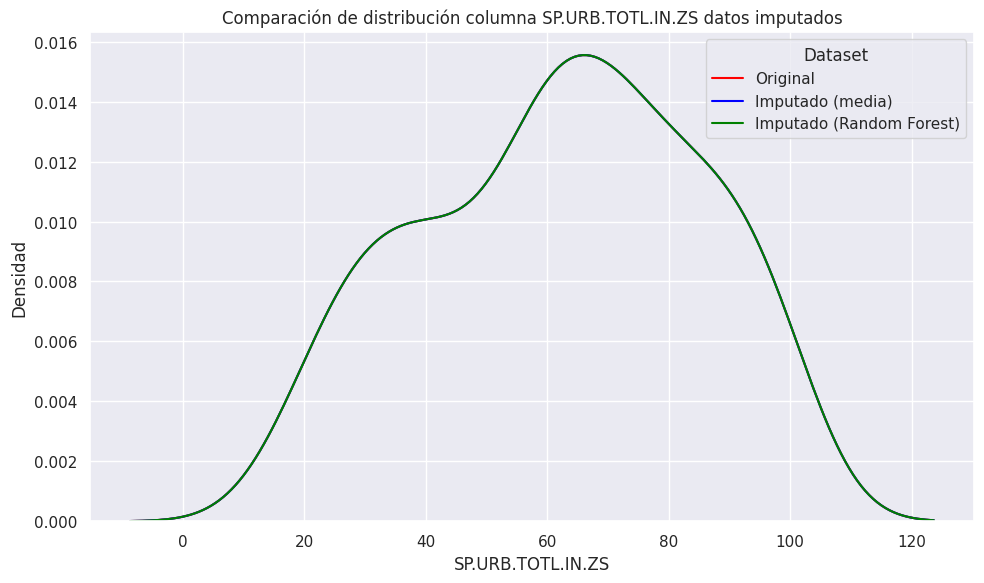

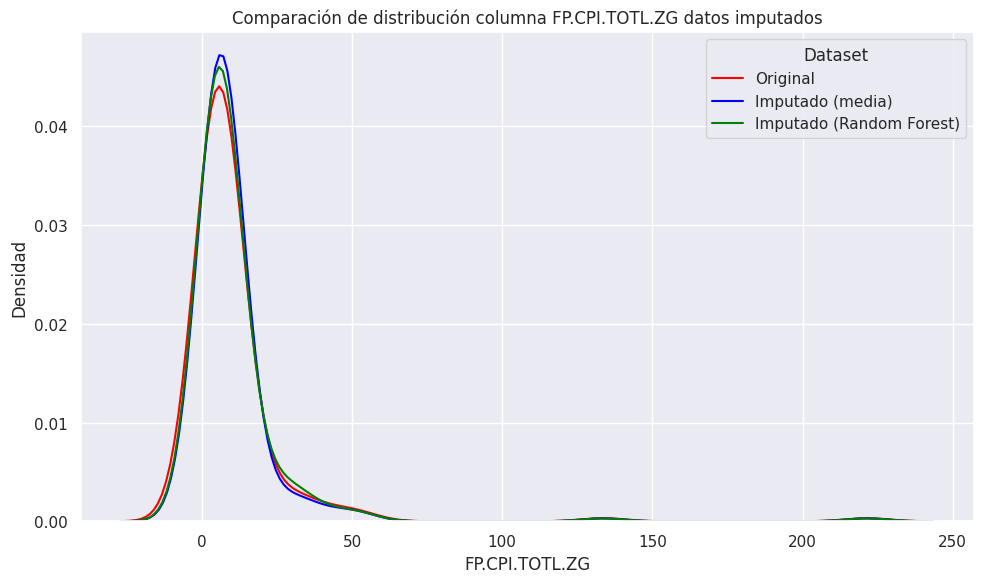

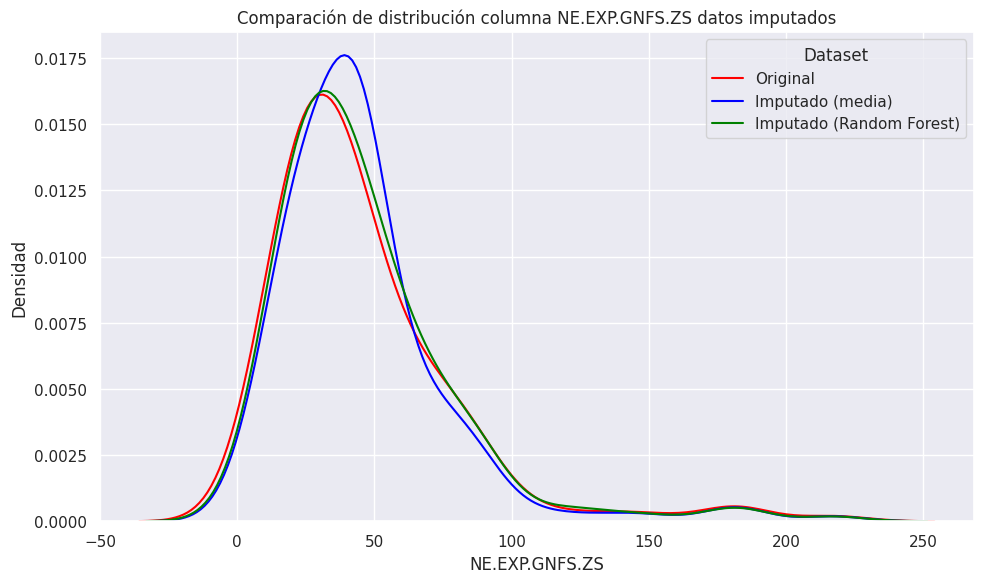

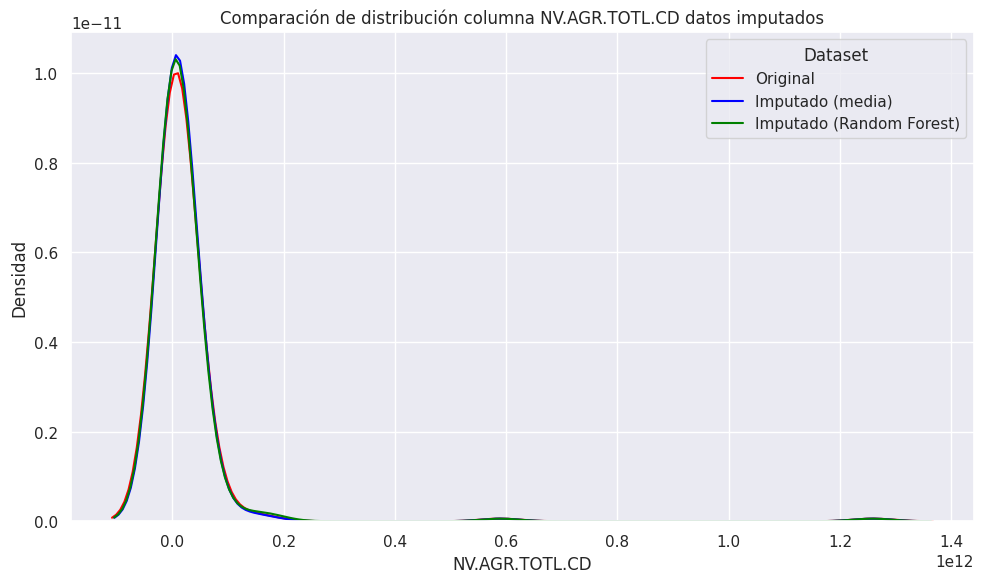

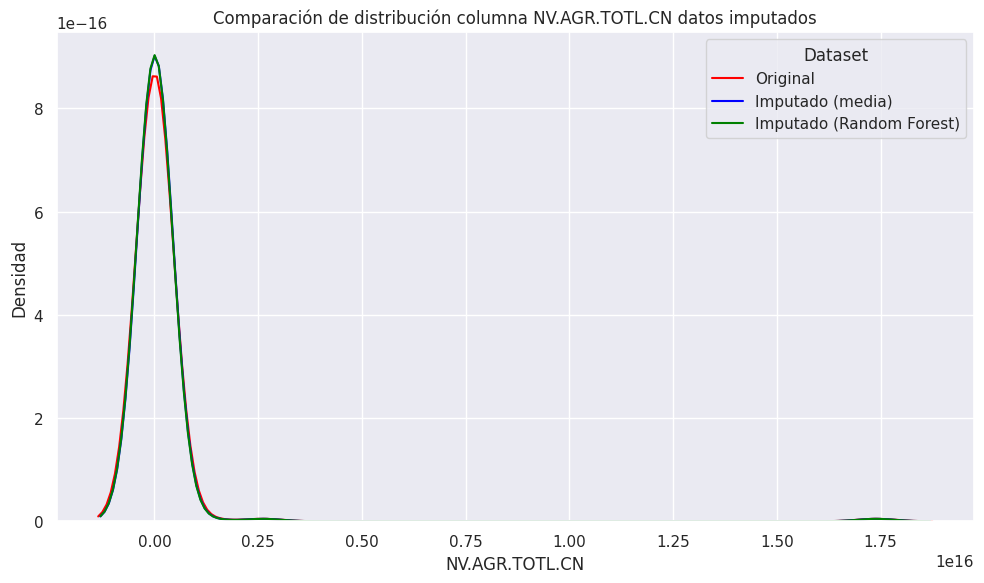

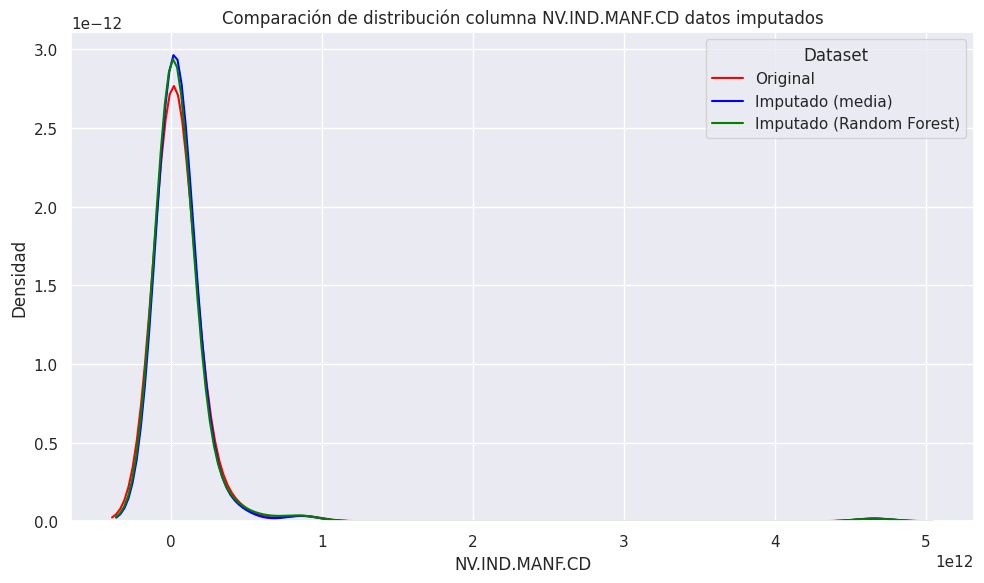

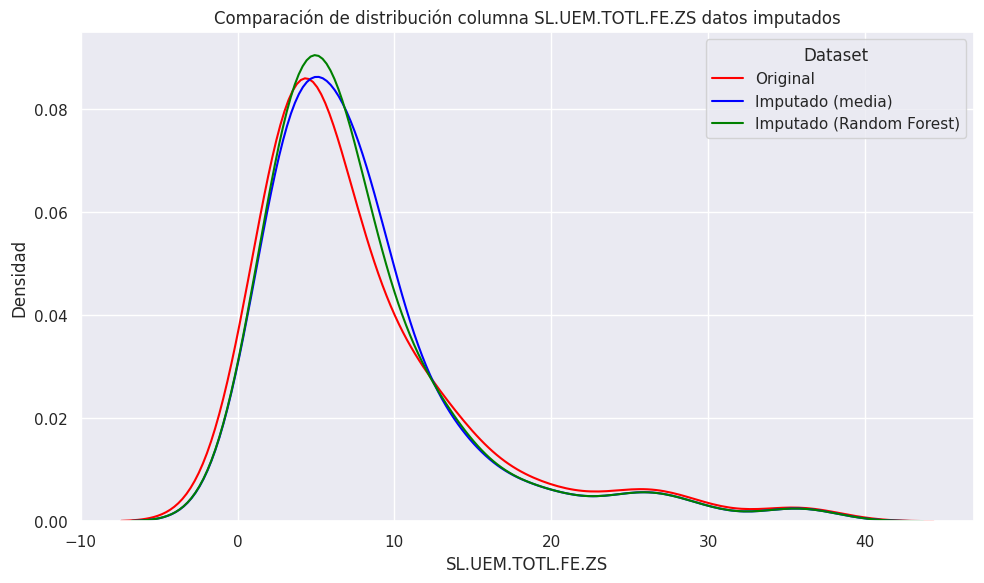

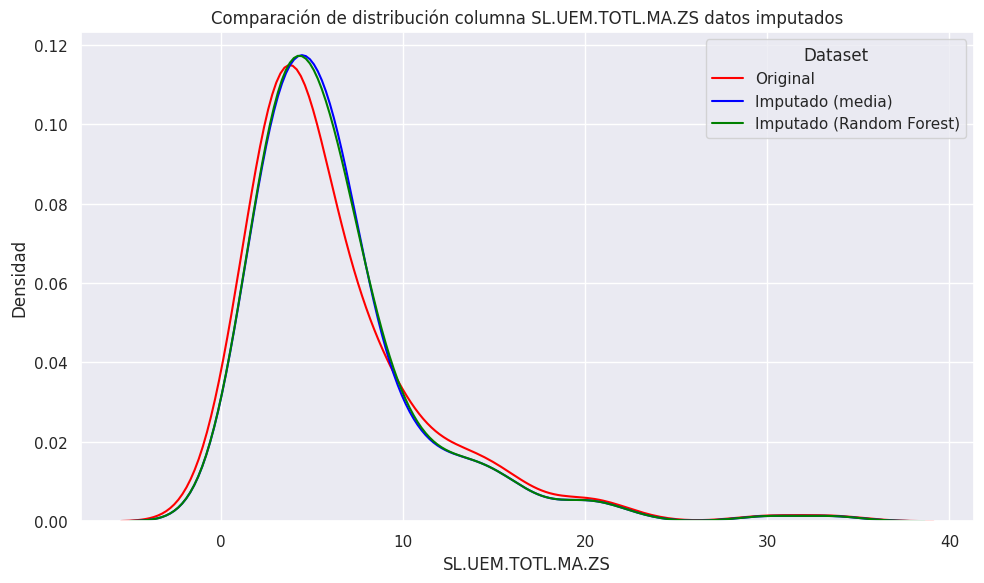

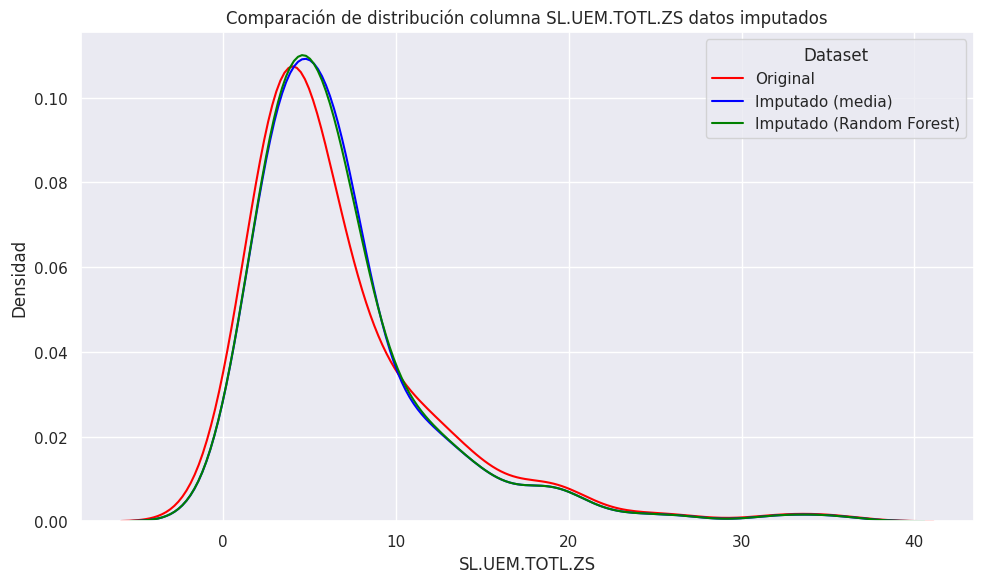

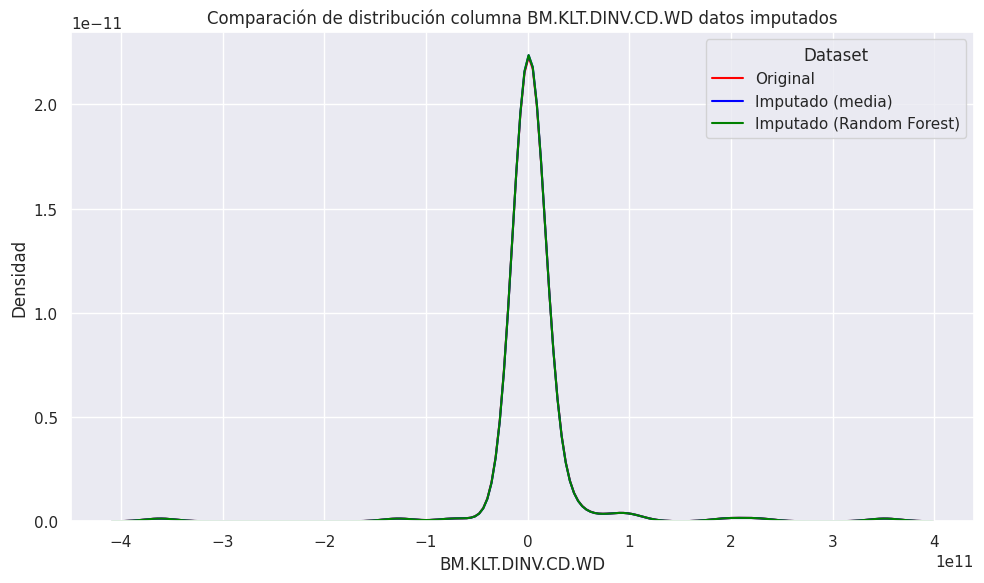

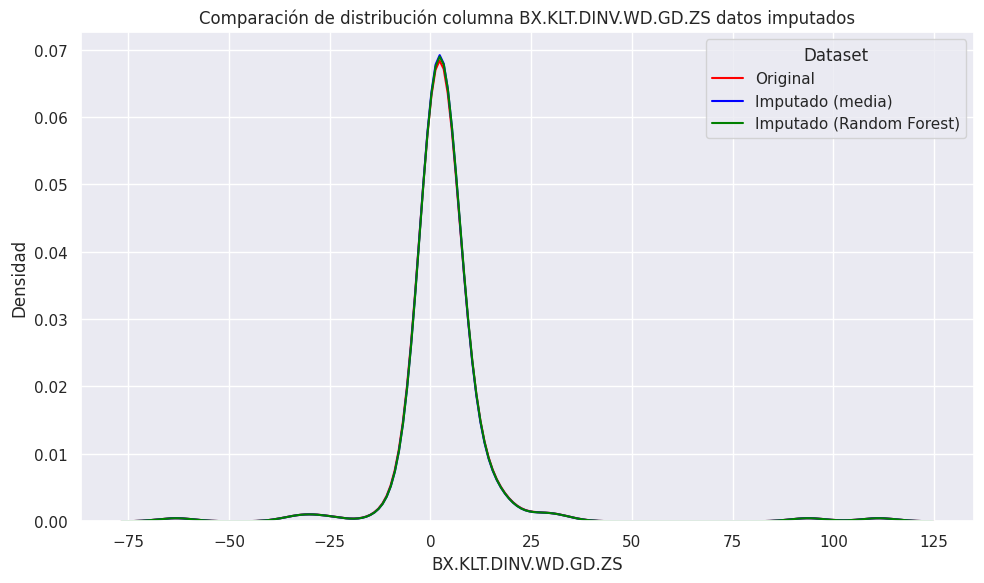

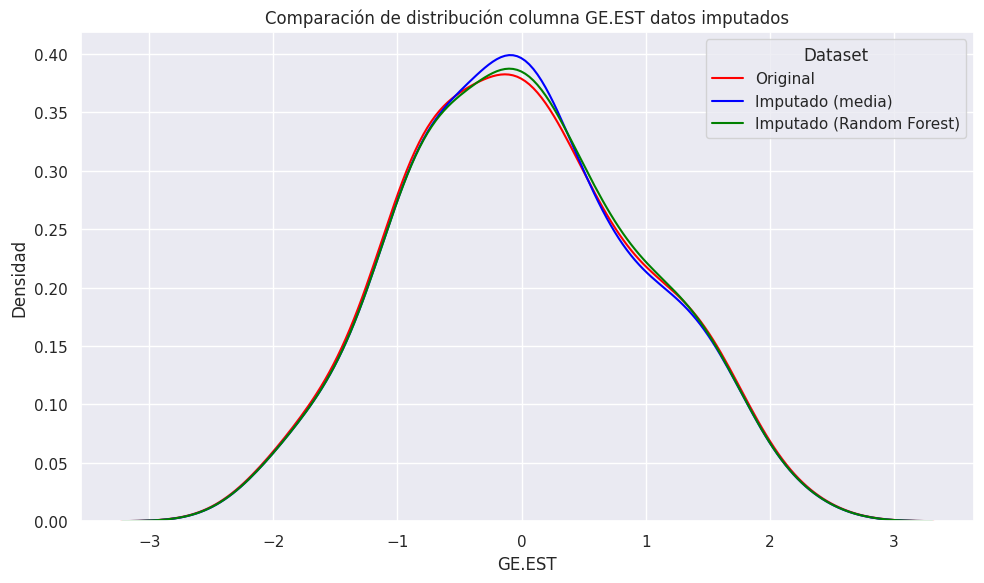

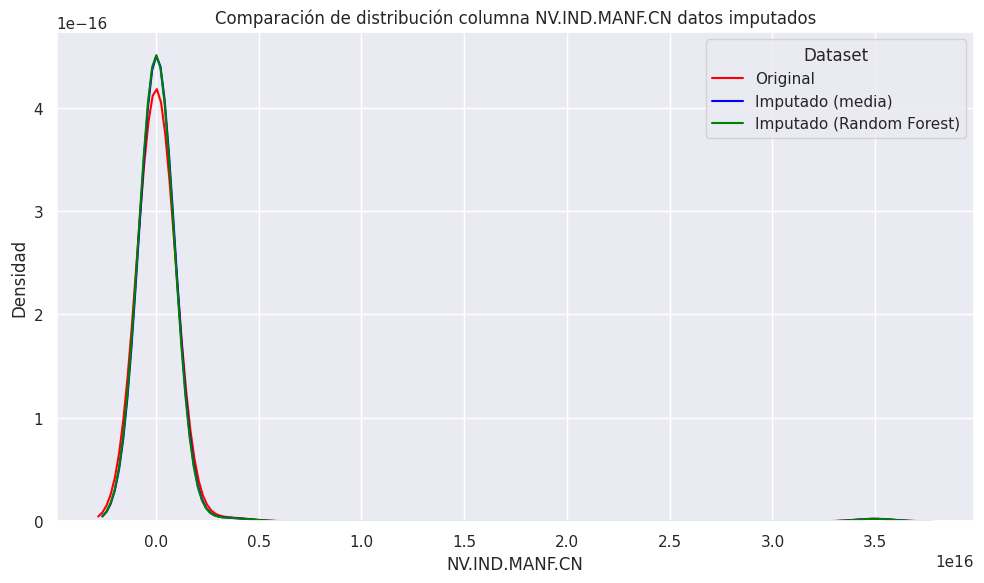

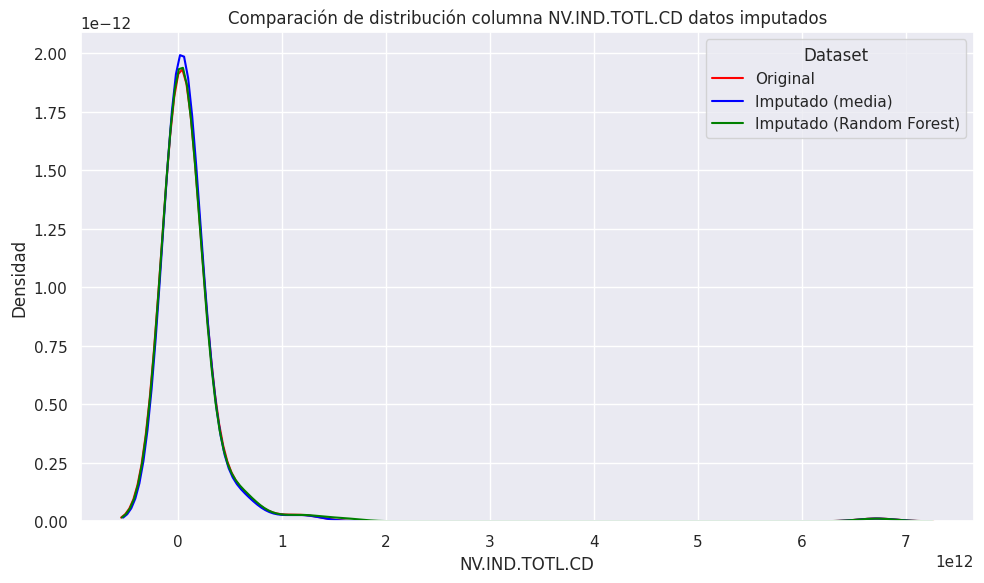

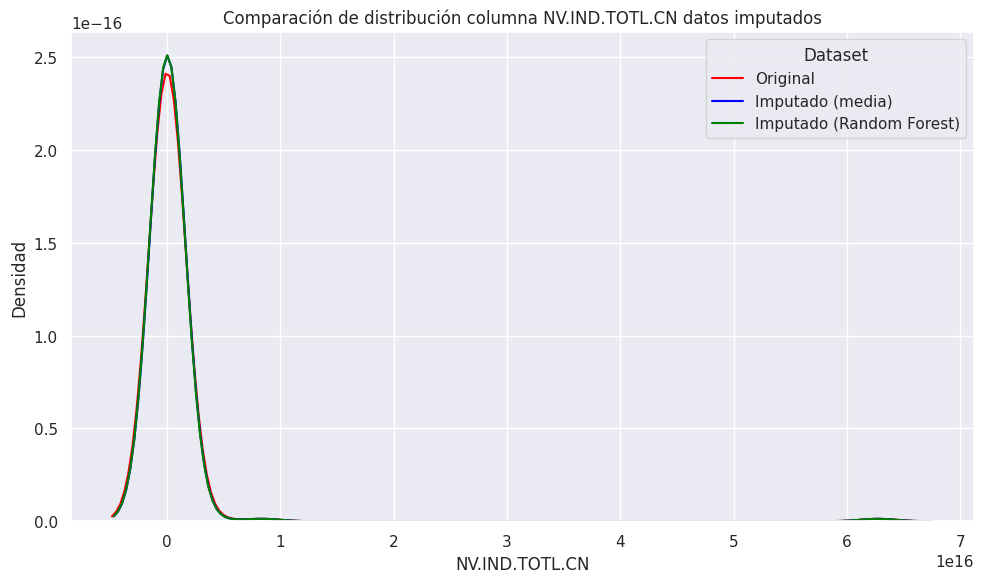

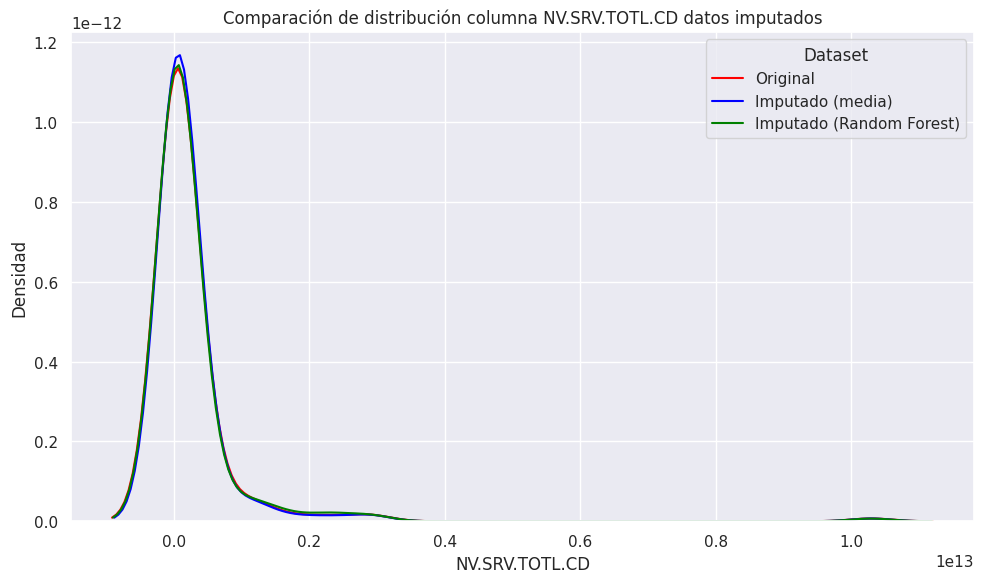

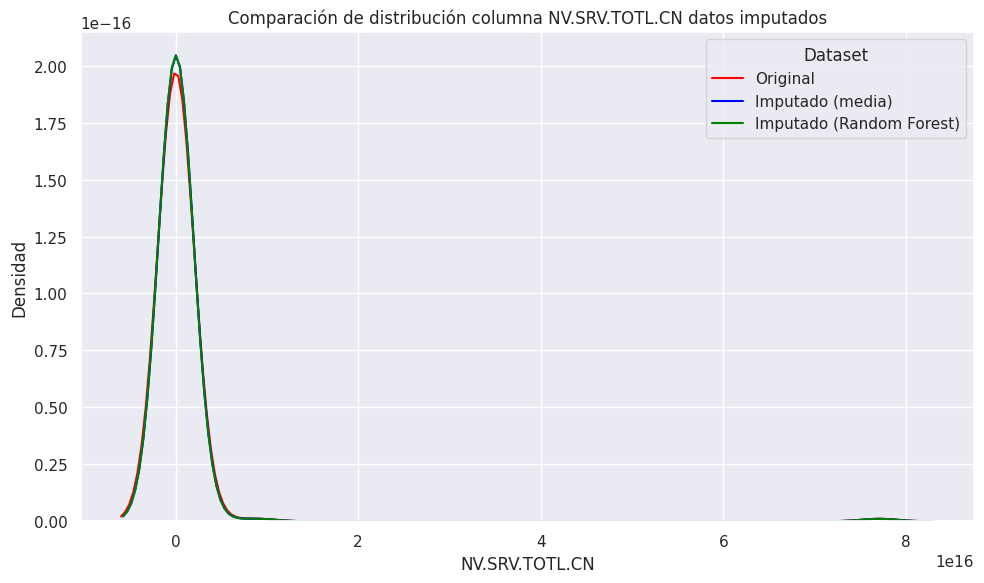

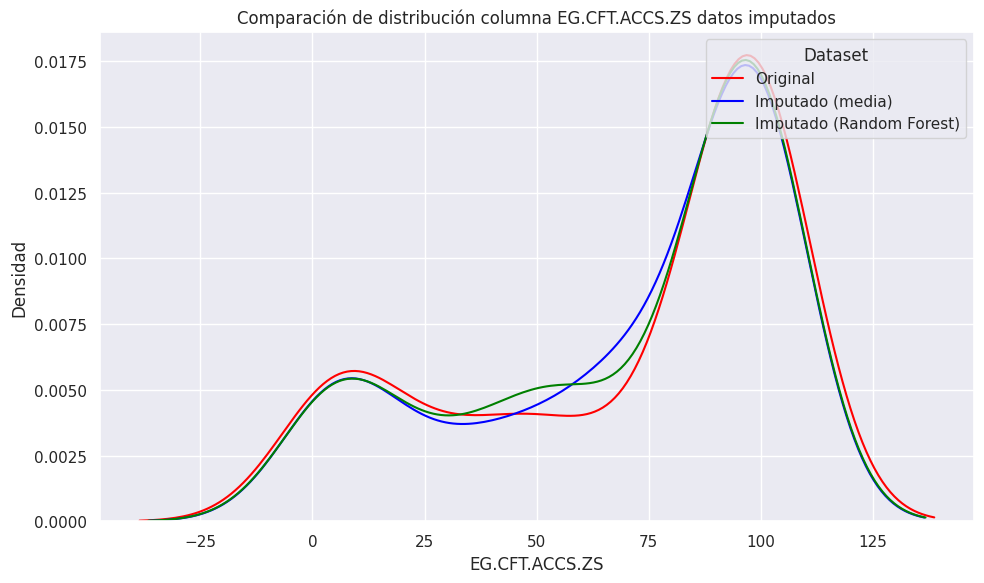

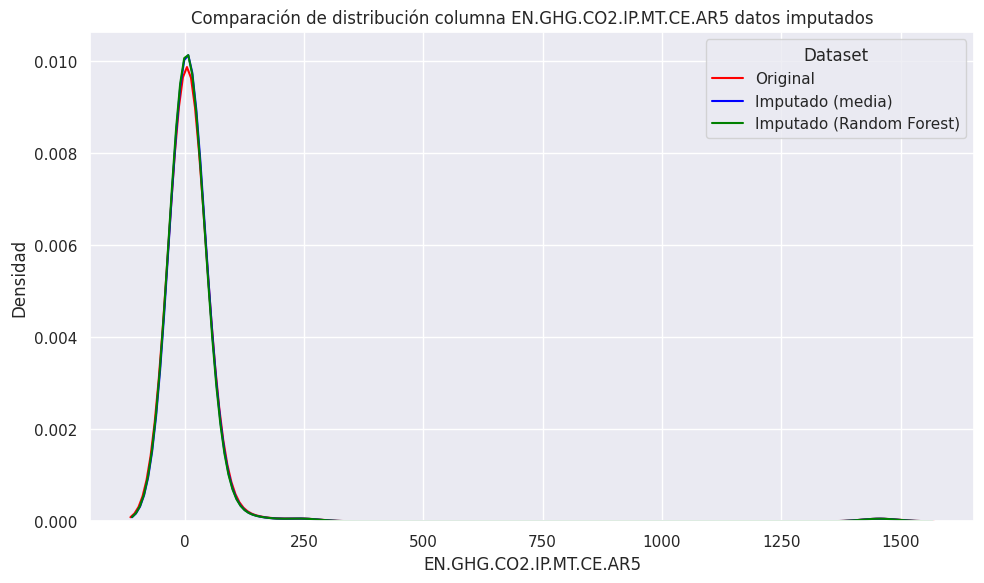

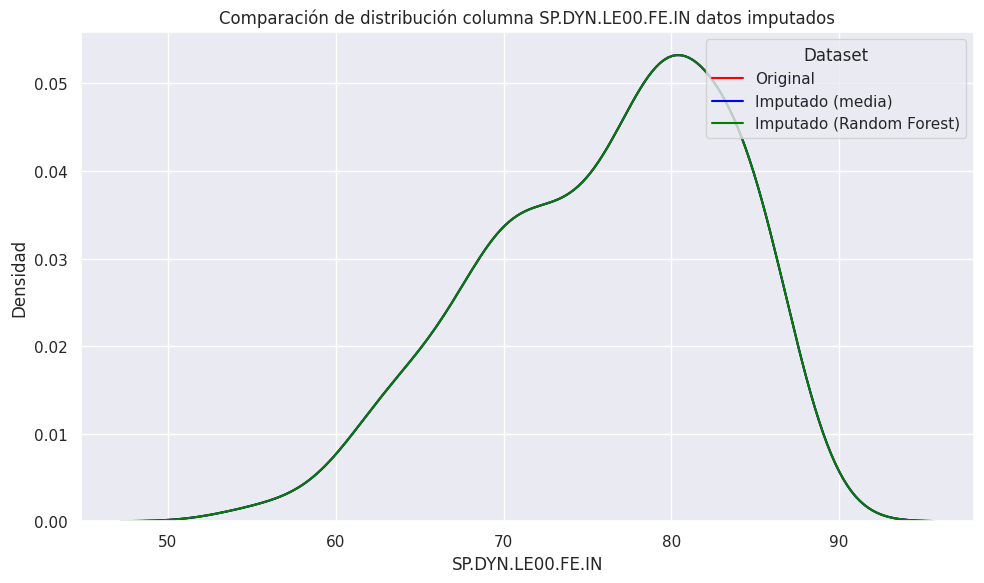

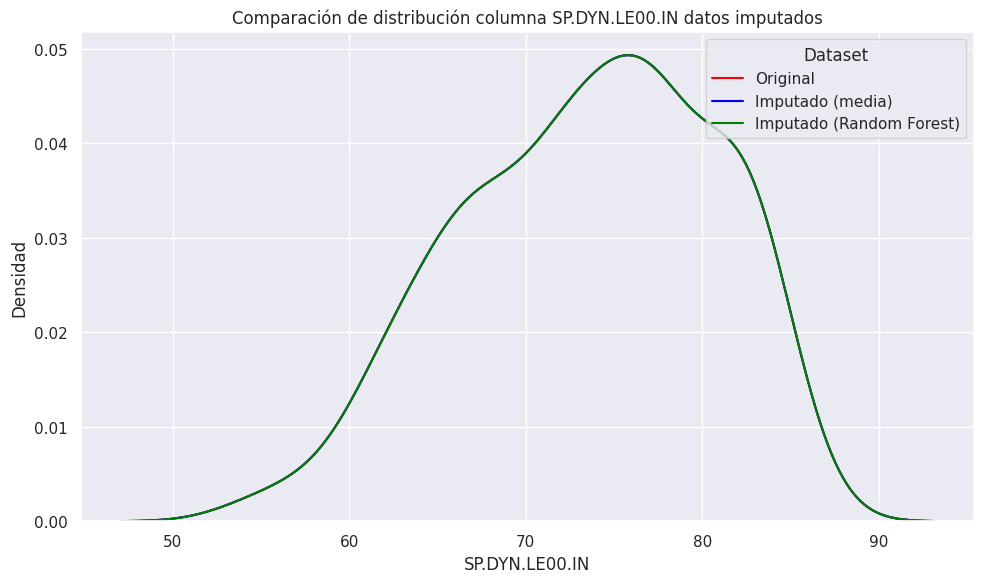

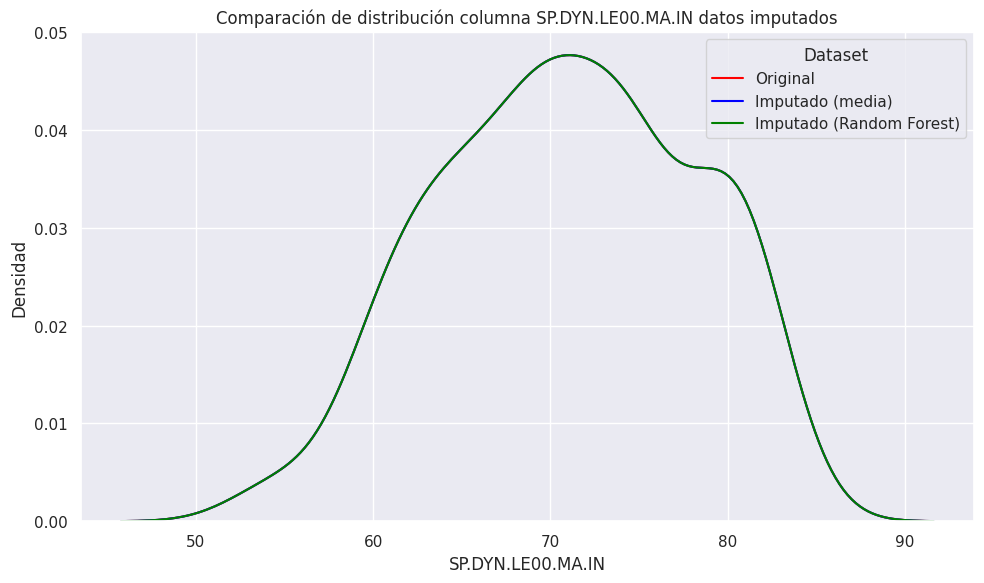

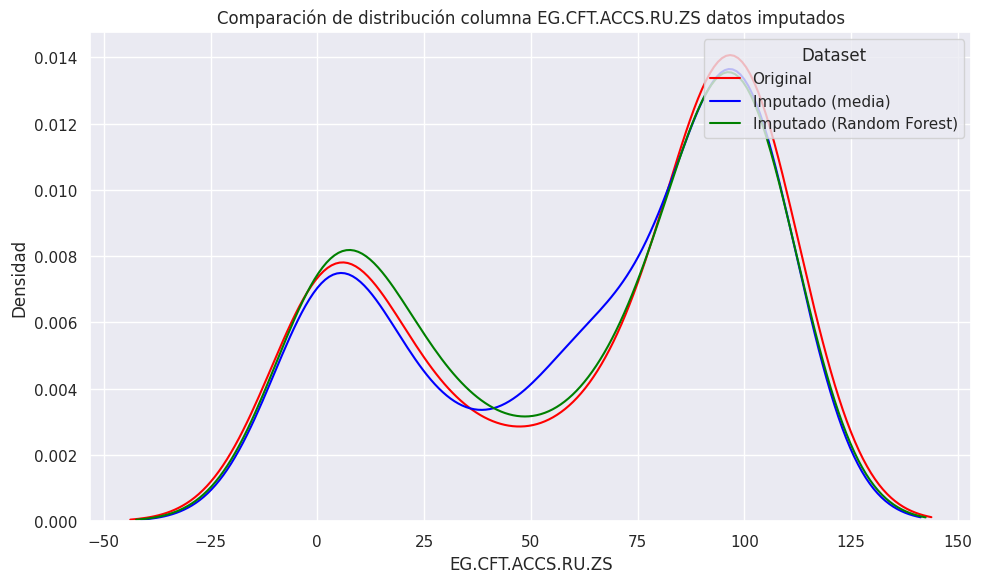

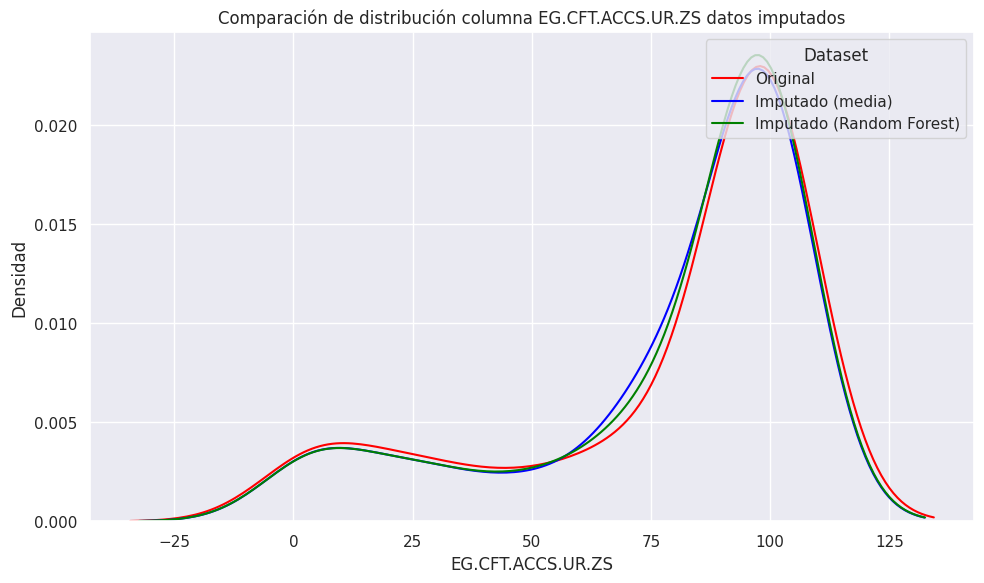

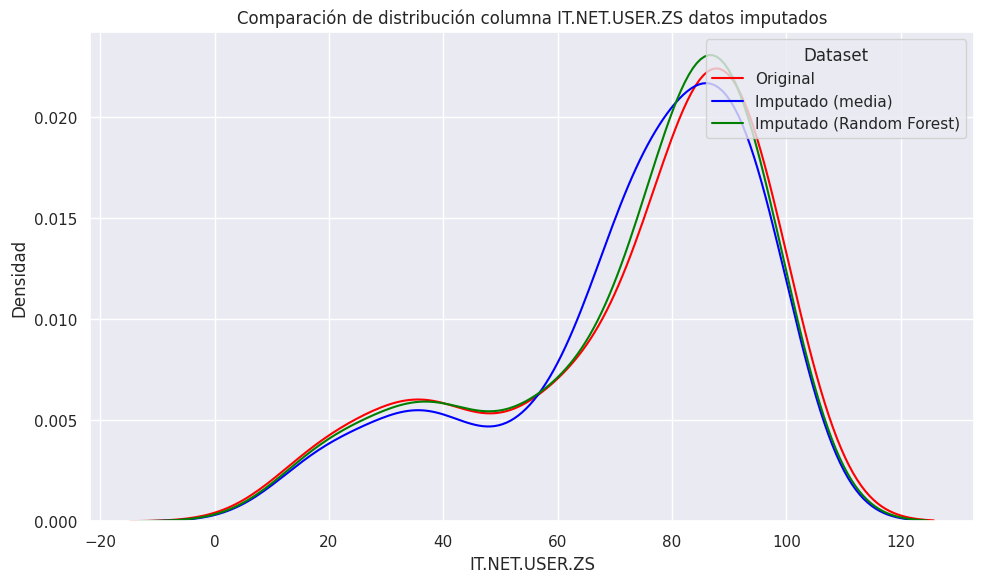

In [132]:
columnas = df_wb_limpio.select_dtypes(include='number').columns

for col in columnas:
  plt.figure(figsize=(10, 6))
  sns.kdeplot(data=df_wb_limpio, x= col, label='Original', color='red')
  sns.kdeplot(data=df_wb_media, x=col, label='Imputado (media)', color='blue')
  sns.kdeplot(data=df_randomf, x=col, label='Imputado (Random Forest)', color='green')

  plt.legend(title='Dataset', loc='upper right')
  plt.title(f"Comparación de distribución columna {col} datos imputados")
  plt.xlabel(col)
  plt.ylabel("Densidad")
  plt.tight_layout()
  plt.show()

Interpretacion: Al comparar las distribuciones, el metodo Random Forest genera valores iputados que se parecen mas a los datos reales. Por eso es mejor y elegimos: Mantiene mejor la forma y tendencia de laas variables y reduce el sesgo que podria introducir una imputacion mas simple como la media.

In [133]:
df_randomf.describe()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  \
count       1.980000e+02         198.000000    1.980000e+02   198.000000   
mean        8.388712e+11          42.039815    1.835986e+07     1.152752   
std         3.129922e+12           8.519759    7.166619e+07     1.576210   
min         5.705451e+07           6.846247    3.361400e+04    -8.423008   
25%         2.586691e+10          40.128389    7.131290e+05     0.282878   
50%         8.596764e+10          44.562492    3.175596e+06     1.112108   
75%         4.615291e+11          47.452732    1.069484e+07     2.088224   
max         3.200488e+13          54.670843    7.746076e+08     6.527050   

        SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
count  1.980000e+02       1.980000e+02         198.000000       1.980000e+02   
mean   3.999611e+07       1.987776e+07          49.973491       2.011836e+07   
std    1.484957e+08       7.252840e+07           2.993389       7.598056e+07   
min    9.816000e+03       4.795000e+03          28.483741       5.021000e+03   
25%    1.373786e+06       6.876850e+05          49.651875       6.826450e+05   
50%    7.335048e+06       3.672054e+06          50.329281       3.560820e+06   
75%    2.936413e+07       1.403224e+07          51.189445       1.424457e+07   
max    1.438070e+09       6.961863e+08          54.920880       7.418833e+08   

       SP.POP.TOTL.MA.ZS   SP.RUR.TOTL  ...  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  \
count         198.000000  1.980000e+02  ...    1.980000e+02    1.980000e+02   
mean           50.026509  1.709937e+07  ...    2.489327e+11    5.009523e+14   
std             2.993389  7.663858e+07  ...    8.640029e+11    5.513602e+15   
min            45.079120  0.000000e+00  ...    1.838905e+08    1.838905e+08   
25%            48.810555  4.134135e+05  ...    5.884022e+09    4.676045e+10   
50%            49.670719  1.983892e+06  ...    2.074486e+10    6.449825e+11   
75%            50.348125  1.024225e+07  ...    1.619981e+11    1.017999e+13   
max            71.516259  9.337718e+08  ...    1.029315e+13    7.703243e+16   

       EG.CFT.ACCS.ZS  EN.GHG.CO2.IP.MT.CE.AR5  SP.DYN.LE00.FE.IN  \
count      198.000000               198.000000         198.000000   
mean        69.971187                16.227275          76.119303   
std         35.227745               105.877146           7.221813   
min          0.100000                 0.000000          54.743000   
25%         44.700000                 0.126500          70.733000   
50%         88.300000                 1.279350          77.486500   
75%        100.000000                 4.986950          81.700000   
max        100.000000              1456.092000          88.090000   

       SP.DYN.LE00.IN  SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  \
count      198.000000         198.000000         198.000000   
mean        73.476060          70.910354          60.604040   
std          7.085527           7.104323          40.726646   
min         54.462000          53.195000           0.000000   
25%         67.713000          65.379000          14.287500   
50%         74.292890          70.666000          78.505000   
75%         78.485976          75.803000         100.000000   
max         85.706000          84.206000         100.000000   

       EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
count         198.000000      198.000000  
mean           78.856237       72.205211  
std            31.177606       23.620676  
min             0.100000       11.078400  
25%            72.050000       58.342525  
50%            95.800000       81.271600  
75%           100.000000       89.197700  
max           100.000000      100.000000  

[8 rows x 39 columns]

ABOD

In [134]:
%pip install pyod

In [135]:
from pyod.models.abod import ABOD


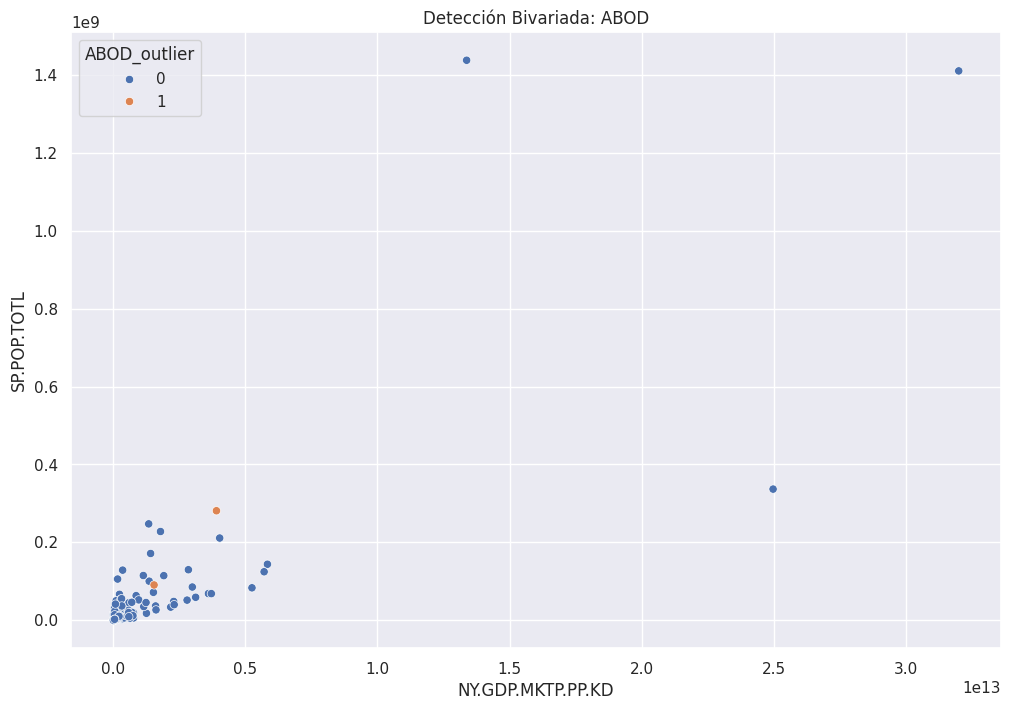

np.int64(2)

In [136]:
abod_clf = ABOD(contamination=0.01)

df_a = df_randomf.copy()

numeric_cols = df_a.select_dtypes(include=np.number).columns
abod_clf.fit(df_a[numeric_cols])

df_a['ABOD_outlier'] = abod_clf.labels_

sns.set(rc = {'figure.figsize':(12,8)})
sns.scatterplot(data=df_a, x='NY.GDP.MKTP.PP.KD', y='SP.POP.TOTL', hue='ABOD_outlier')
plt.title('Detección Bivariada: ABOD')
plt.show()

df_a['ABOD_outlier'].sum()

Escalar de datos

In [137]:
y = df_randomf['NY.GDP.MKTP.PP.KD']
x = df_randomf.drop(columns='NY.GDP.MKTP.PP.KD')

In [138]:
from sklearn.preprocessing import StandardScaler


In [139]:

scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=x.columns)

In [140]:
import matplotlib.pyplot as plt


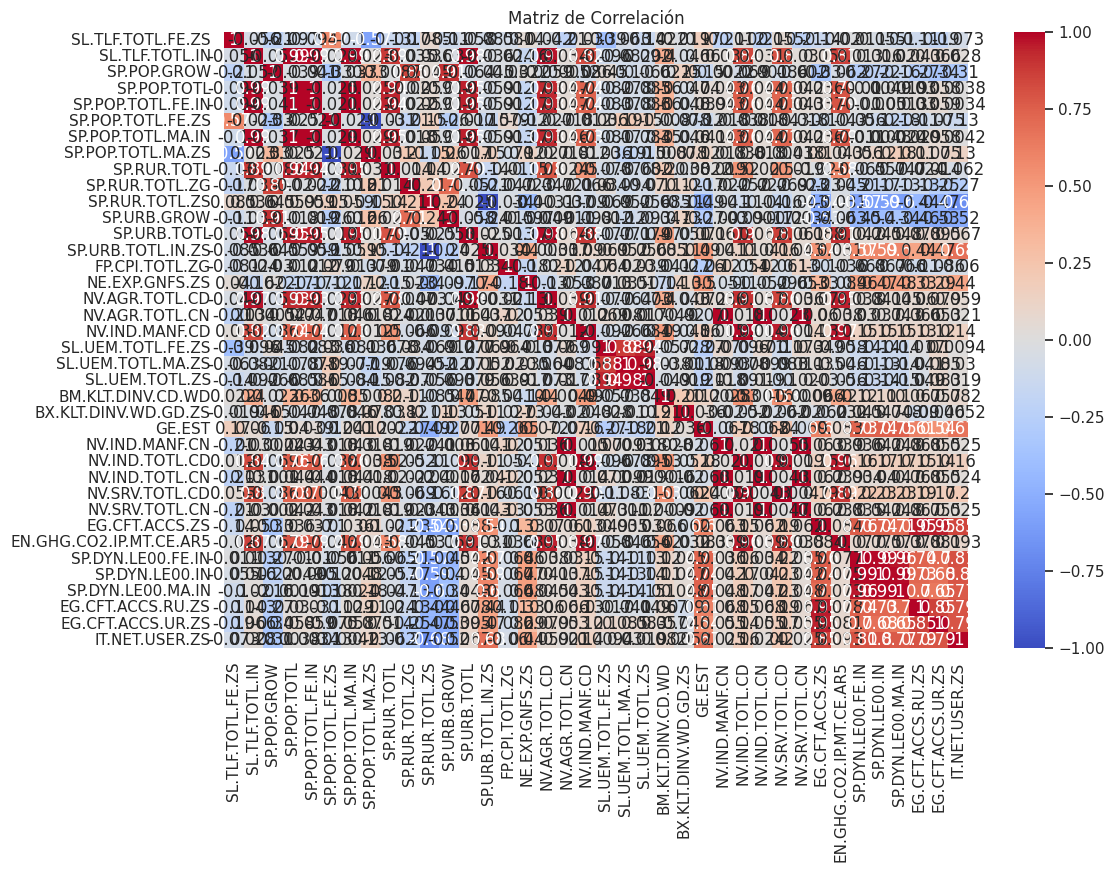

In [141]:
corr = x_std.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [142]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_std)

pca.explained_variance_ratio_



array([2.66298402e-01, 2.09393438e-01, 1.09297570e-01, 9.06184302e-02,
       7.55099481e-02, 4.58031587e-02, 3.49997983e-02, 3.05220156e-02,
       2.82114884e-02, 2.64965719e-02, 1.89798801e-02, 1.52236653e-02,
       1.28596355e-02, 1.15722494e-02, 6.50443327e-03, 4.78964766e-03,
       3.64093475e-03, 3.12690516e-03, 2.11892028e-03, 1.33220951e-03,
       8.44639754e-04, 5.99889989e-04, 5.10733572e-04, 2.21262176e-04,
       1.77434978e-04, 1.43633441e-04, 8.41823589e-05, 6.66459715e-05,
       2.67049157e-05, 1.56699328e-05, 4.35656891e-06, 2.33431939e-06,
       2.18902447e-06, 1.02020608e-06, 6.83731384e-31, 1.31901550e-33,
       1.31901550e-33, 1.29525128e-33])

In [143]:
np.sum(pca.explained_variance_ratio_[:5])

np.float64(0.7511177890726131)

In [144]:
pca_2 = PCA(n_components=5)
data_pca = pca_2.fit_transform(x_std)

df_pca = pd.DataFrame(data_pca, columns=['CP1', 'CP2','CP3','CP4','CP5'])
df_pca.head()

CP1       CP2       CP3       CP4       CP5
0 -1.815089 -3.644380 -0.145694 -1.154715 -0.165492
1 -1.834548 -3.762430 -0.230295  0.854099 -0.343465
2 -1.231055 -1.263561  0.043136 -0.082035  0.650257
3  1.234612  0.331905  1.001307  0.279644 -2.165059
4 -1.645341 -2.729969 -0.235013  0.889173 -0.793582

In [145]:
df_pca.corr()

CP1           CP2           CP3           CP4           CP5
CP1  1.000000e+00 -2.094593e-16  8.787506e-17  9.052360e-17  3.221633e-16
CP2 -2.094593e-16  1.000000e+00 -3.940543e-16  3.882038e-16  3.623724e-16
CP3  8.787506e-17 -3.940543e-16  1.000000e+00 -5.592675e-16 -4.327014e-16
CP4  9.052360e-17  3.882038e-16 -5.592675e-16  1.000000e+00  8.134220e-17
CP5  3.221633e-16  3.623724e-16 -4.327014e-16  8.134220e-17  1.000000e+00

Interpretacion: Como varias variables del dataset entregan informacion parecida (están correlacionadas), usamos PCA para “resumir” el dataset en menos variables nuevas que concentran la mayor parte de la información. En este caso, los primeros 5 componentes explican cerca del 75% de la variacion total, lo que permite reducir la cantidad de variables sin perder demasiada informacio y dejando componentes no correlacionados entre sí